In [1]:
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pytz
import seaborn
from matplotlib.finance import candlestick2_ohlc as plt_candle
import time

# OANDA
import configparser
from oandapyV20 import API
import oandapyV20.endpoints.instruments as instruments

# 自作メソッド
from functions import BasicFunctions, conditions
from functions.line_notify_bot import LINENotifyBot

/usr/local/var/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# 設定
config = configparser.ConfigParser()
config.read('config_v1.txt') 
account_id = config['oanda']['account_id']
api_key = config['oanda']['api_key']
instrument = "USD_JPY"
params = {"alignmentTimezone": "Japan","count": 50, "granularity": "M5"}

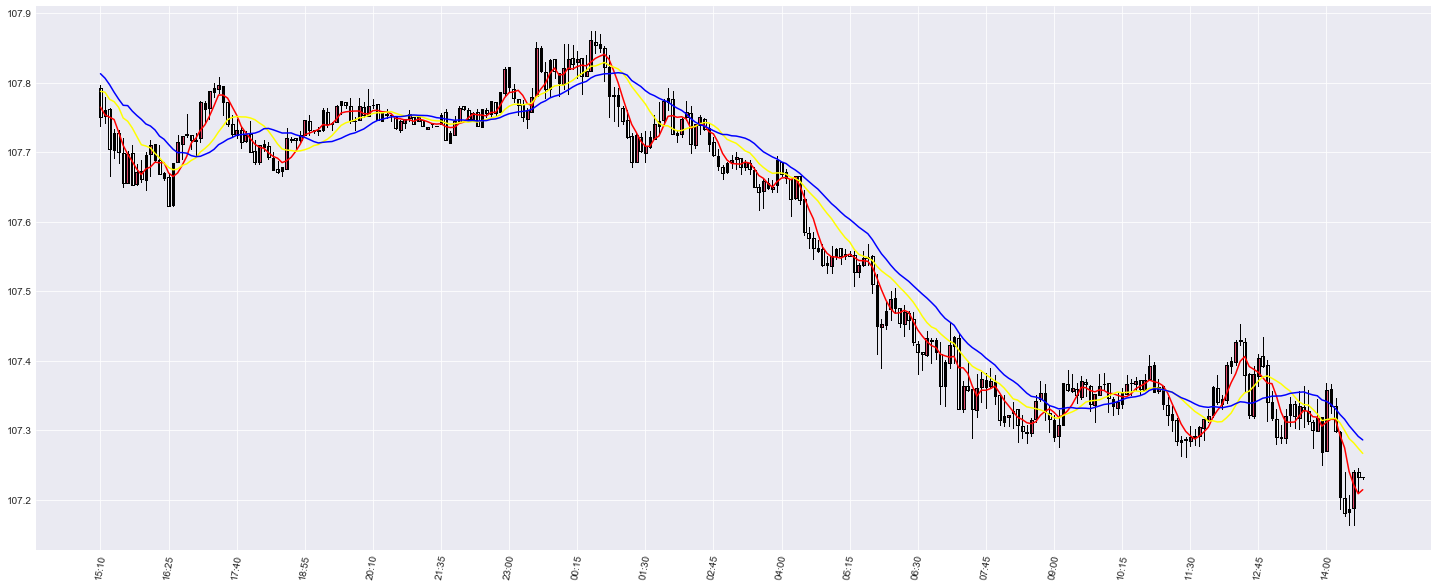

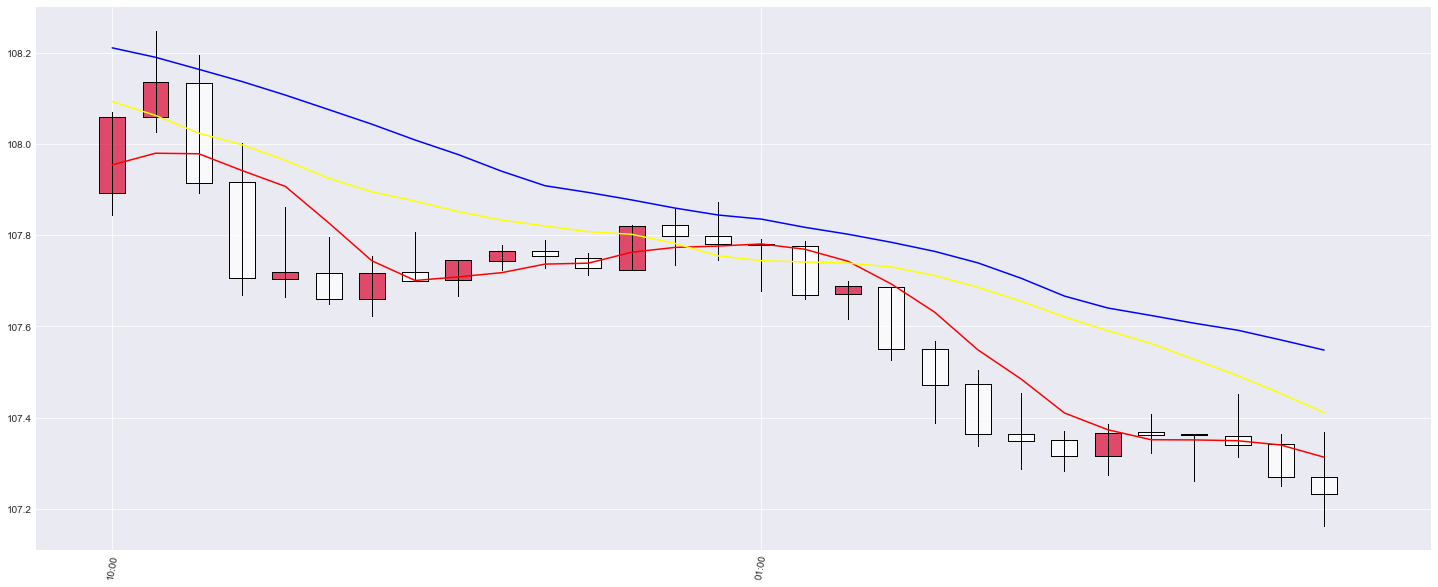

In [54]:
# グラフ確認
params = {"alignmentTimezone": "Japan","count": 300, "granularity": "M5"}
candle = BasicFunctions.get_csvdata(instrument, params, api_key)
BasicFunctions.show_chart(candle)

params = {"alignmentTimezone": "Japan","count": 50, "granularity": "H1"}
candle = BasicFunctions.get_csvdata(instrument, params, api_key)
BasicFunctions.show_chart(candle)

In [31]:
instrument = "USD_JPY"
params = {"count": 50, "granularity": "M5"}
df = BasicFunctions.get_data(api_key, instrument, params)
res_M5 = conditions.check_ave_line(df)
params = {"count": 50, "granularity": "H1"}
df = BasicFunctions.get_data(api_key, instrument, params)
res_H1 = conditions.check_ave_line(df)

[107.2406, 107.28792307692308, 107.30642857142854]
[107.3042, 107.40738461538464, 107.54614285714288]


In [32]:
print("M5 ", res_M5)
print("H1 ", res_H1)

M5  移動平均線が理想的に下降
H1  移動平均線が理想的に下降


移動平均線 赤5本 黄色13本 青21本

## LINEを送信実行

In [58]:
access_token_mine = 'iCOQf3nXJkDKxU5pkOf6Mn4sT3f6DoPGbiZ9AAp0Ry6'
access_token_withdad = '2hOOvaC0SMB0SIrZ2KZ1sZ2USxs1FVqBh7vNh1T4eJ0'
bot = LINENotifyBot(access_token=access_token_mine)
bot.send(message="ここからテスト始まります！")

In [59]:

if (res_M5 !=""):

    if (res == res_H1 and res != sent_res):
        res = res_M5
        sent_res = res
        print(sent_res)
#             bot.send(message= instrument +"5分軸、1時間軸共条件を満たしました\n"+ res)
    else:
        print("すでに送信した")

messageに通貨ペアをアナウンス

In [ ]:
instrument = "USD_JPY"
sent_res = ""
res = ""
for i in range(0, 60, 1):
    params = {"count": 50, "granularity": "M5"}
    df = BasicFunctions.get_data(api_key, instrument, params)
    res_M5 = conditions.check_ave_line(df)
    params = {"count": 50, "granularity": "H1"}
    df = BasicFunctions.get_data(api_key, instrument, params)
    res_H1 = conditions.check_ave_line(df)
    if (res_M5 !=""):
        res = res_M5
        if (res_M5 == res_H1 and res != sent_res):
            bot.send(message= instrument +"5分軸、1時間軸共条件を満たしました\n"+ res)
            sent_res = res
    print(i*5, "分経過", res)
    time.sleep(300)

[107.22999999999999, 107.24792307692307, 107.24457142857145]
[107.26559999999999, 107.34376923076921, 107.49942857142857]
0 分経過 
[107.2366, 107.25030769230769, 107.24804761904764]
[107.25340000000001, 107.32292307692306, 107.47676190476191]
5 分経過 


## メールを送る

In [6]:
# smtp_host = 'smtp.gmail.com'
# smtp_port = 465
# username = 'saaaxx.y0717@gmail.com'
# password = 'Ko1116q4MD'
# from_address = 'saaaxx.y0717@gmail.com'
# to_address = 'saaaxx.y0717@gmail.com'
# subject = 'test subject'
# body = 'test body'
# message = ("From: %s\r\nTo: %s\r\nSubject: %s\r\n\r\n%s" % (from_address, to_address, subject, body))

# smtp = smtplib.SMTP_SSL(smtp_host, smtp_port)
# smtp.login(username, password)
# result = smtp.sendmail(from_address, to_address, message)
# print(result)

In [78]:
#メール
import smtplib
import os
import pickle
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
import base64
from email.mime.text import MIMEText
from apiclient import errors


In [79]:
# Gmail APIのスコープを設定
SCOPES = ['https://www.googleapis.com/auth/gmail.send']
# メール本文の作成
def create_message(sender, to, subject, message_text):
    message = MIMEText(message_text)
    message['to'] = to
    message['from'] = sender
    message['subject'] = subject
    encode_message = base64.urlsafe_b64encode(message.as_bytes())
    return {'raw': encode_message.decode()}

# メール送信の実行
def send_message(service, user_id, message):
    try:
        message = (service.users().messages().send(userId=user_id, body=message)
                   .execute())
        print('Message Id: %s' % message['id'])
        return message
    except errors.HttpError as error:
        print('An error occurred: %s' % error)
        

def main():
    # 5. アクセストークンの取得
    creds = None
    if os.path.exists('token.pickle'):
        with open('token.pickle', 'rb') as token:
            creds = pickle.load(token)
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file('../client_secret_226080186606-qrskl6haa432e78q4u39so90nf9ue72n.apps.googleusercontent.com.json', SCOPES)
            creds = flow.run_local_server()
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)
    service = build('gmail', 'v1', credentials=creds)
    # 6. メール本文の作成
    sender = 'saaaxx.y0717@gmail.com'
    to = 'saaaxx.y0717@gmail.com'
    subject = 'メール送信自動化テスト'
    message_text = 'メール送信の自動化テストをしています。'
    message = create_message(sender, to, subject, message_text)
    # 7. Gmail APIを呼び出してメール送信
    send_message(service, 'me', message)



In [80]:
main()

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=226080186606-qrskl6haa432e78q4u39so90nf9ue72n.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fgmail.send&state=3iJtG5zzsFRJH68QoIgnTtSIjDGCaF&access_type=offline


KeyboardInterrupt: 

In [ ]:
# ゴールデンクロス、デッドクロスを可視化

seaborn.set_style("whitegrid")

# csvを読み込む
candle = pd.read_csv('candle.csv')

#移動平均を求める
small_window = 5 # 5分平均線を求める
big_window   = 20 #　20分平均線求める
sma5         = pd.Series.rolling(candle.c, window = small_window).mean()
sma20        = pd.Series.rolling(candle.c, window = big_window).mean()

candle = candle[ big_window: ].reset_index(drop=True)
sma5 = sma5[ big_window: ].reset_index(drop=True)
sma20 = sma20[ big_window: ].reset_index(drop=True)

#ゴールデンクロス、デッドクロスを見つける
cross  = sma5 > sma20
golden = (cross != cross.shift(1)) & (cross == True)
dead   = (cross != cross.shift(1)) & (cross == False)

#ゴールデンクロス、デッドクロスの位置をリスト化する
index_g = [i-1 for i, x in enumerate(golden) if x == True]
index_d = [i-1 for i, x in enumerate(dead) if x == True]

# X軸の見た目を整える
# 時間だけを切り出すために先頭からの12文字目から取るようにしている
xticks_number = 15 #15分刻みに目盛りを書く
xticks_index = range(0,len(candle), xticks_number)
xticks_date = [candle.time.values[i][11:16] for i in xticks_index]

figure, ax = plt.subplots()
plt_candle( ax,
            opens = candle.o.values,
            highs = candle.h.values,
            lows = candle.l.values,
            closes = candle.c.values,
            width=0.6,
            colorup='#DC143C',
            colordown='#4169E1')
plt.plot(sma5, color='greenyellow', label='sma5')
plt.plot(sma20, color='darkgreen', label='sma20')
plt.scatter(index_g, sma20[index_g], color='red', s=500, label="golden cross")
plt.scatter(index_d, sma20[index_d], color='blue', s=500, label="dead cross")
plt.xticks(xticks_index, xticks_date, rotation=80)
plt.legend()
plt.show()

In [ ]:
"""
To show heartbeat, replace [options] by -b or --displayHeartBeat
"""

import requests
import json

from optparse import OptionParser

def connect_to_stream():

    """
    Environment                 Description 
    fxTrade (Live)              The live (real money) environment 
    fxTrade Practice (Demo)     The demo (simulated money) environment 
    """
    domainDict = { 'live' : 'stream-fxtrade.oanda.com',
               'demo' : 'stream-fxpractice.oanda.com' }

    # Replace the following variables with your personal values 
    environment = "demo" # Replace this 'live' if you wish to connect to the live environment 
    domain = domainDict[environment] 
    access_token = 'REPLACE THIS WITH YOUR ACCESS TOKEN'
    account_id = 'REPLACE THIS WITH YOUR ACCOUNT ID, ie  2252344'
    instruments = 'REPLACE THIS WITH THE INSTRUMENTS YOU WOULD LIKE TO SUBSCRIBE TO.  ie "EUR_USD,USD_JPY,...' 

    try:
        s = requests.Session()
        url = "https://" + domain + "/v1/prices"
        headers = {'Authorization' : 'Bearer ' + access_token,
                   # 'X-Accept-Datetime-Format' : 'unix'
                  }
        params = {'instruments' : instruments, 'accountId' : account_id}
        req = requests.Request('GET', url, headers = headers, params = params)
        pre = req.prepare()
        resp = s.send(pre, stream = True, verify = True)
        return resp
    except Exception as e:
        s.close()
        print("Caught exception when connecting to stream\n" + str(e)) 

def demo(displayHeartbeat):
    response = connect_to_stream()
    if response.status_code != 200:
        print(response.text)
        return
    for line in response.iter_lines(1):
        if line:
            try:
                line = line.decode('utf-8')
                msg = json.loads(line)
            except Exception as e:
                print("Caught exception when converting message into json\n" + str(e))
                return

            if "instrument" in msg or "tick" in msg or displayHeartbeat:
                print(line)

def main():
    usage = "usage: %prog [options]"
    parser = OptionParser(usage)
    parser.add_option("-b", "--displayHeartBeat", dest = "verbose", action = "store_true", 
                        help = "Display HeartBeat in streaming data")
    displayHeartbeat = False

    (options, args) = parser.parse_args()
    if len(args) > 1:
        parser.error("incorrect number of arguments")
    if options.verbose:
        displayHeartbeat = True
    demo(displayHeartbeat)


main()
